In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob
import random

np.random.seed(1001)
random.seed(1001)

# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 100
memory = [20, 30, 50, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap= 10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m, print_freq=10, minorant_update='agg_lin')
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 20


/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=223.021469758155, L=-840063.2757961305, U=-3749.923061852199, L0=-840063.2757961305
k=10, rel_gap=0.0404662489661043, L=-4377.693880308359, U=-4207.4347771092125, L0=-4377.693880308359
k=20, rel_gap=0.025920068786026696, L=-4334.201428353061, U=-4224.696991727367, L0=-5011.97577896642
rho=247.35591973486356
k=30, rel_gap=0.02403351214326514, L=-4329.569986208107, U=-4227.957322555269, L0=-4329.569986208107
k=40, rel_gap=0.020914114942974075, L=-4320.555015082365, U=-4232.0455284563295, L0=-4345.4182733437165
k=50, rel_gap=0.017435105424572314, L=-4315.7134242099155, U=-4241.757927557436, L0=-4361.383487420118
k=60, rel_gap=0.01670514103622908, L=-4315.7134242099155, U=-4244.803384992552, L0=-4381.670309279542
k=70, rel_gap=0.01633921278508045, L=-4315.7134242099155, U=-4246.331706894925, L0=-4386.4750973928685
k=80, rel_gap=0.015566618608909922, L=-4315.7134242099155, U=-4249.56211156432, L0=-4320.653362314977
k=90, rel_gap=0.015242511534329073, L=-4315.7134242099155, U=-4

# Centralized solution

In [5]:
h_cvx = ob.cvx_resource_allocation(params=params, R=R)[0]
print(f"{h_cvx=}")

h_cvx=-4278.68493859097


# Plot

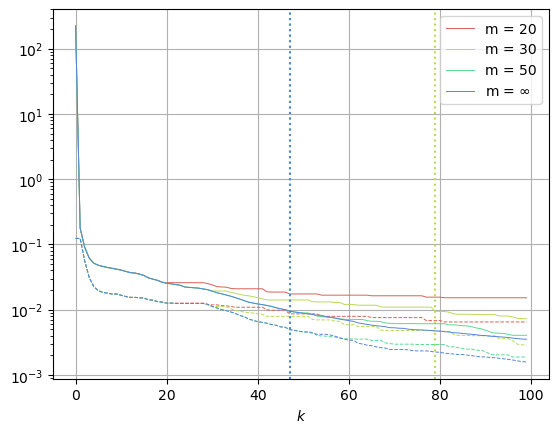

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx, filename='ra_fin_memory_agg.pdf')

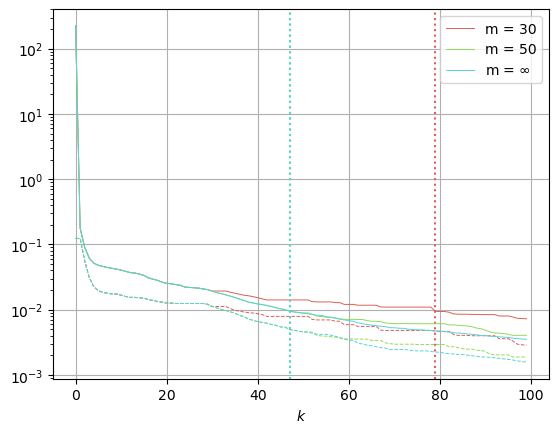

In [7]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=[30, 50, max_iter], h_true=h_cvx, filename='ra_fin_memory_agg_3.pdf')

In [8]:
import pickle

with open('ra_mem_bounds.pickle', 'wb') as handle:
    pickle.dump(memory_bounds, handle, protocol=pickle.HIGHEST_PROTOCOL)